<h1> Customer Segmentation </h1>

<h1> Goal:!!!!</h1>
    <h3>Our aim is to divide your customers up based on common characteristics </h3>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [2]:
#loading the data
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()  

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h2> EDA </h2>

In [4]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
23,24,Male,31,25,73
102,103,Male,67,62,59
140,141,Female,57,75,5
26,27,Female,45,28,32
119,120,Female,50,67,57
125,126,Female,31,70,77
141,142,Male,32,75,93
55,56,Male,47,43,41
124,125,Female,23,70,29
127,128,Male,40,71,95


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


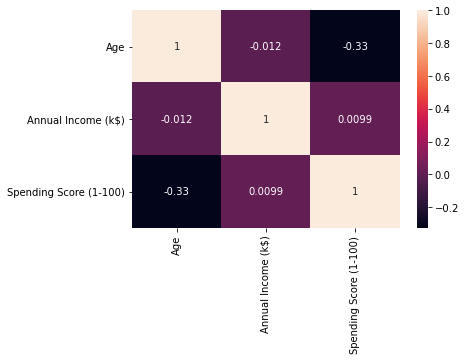

In [8]:
sns.heatmap(df.drop('CustomerID',axis=1).corr(),annot=True)

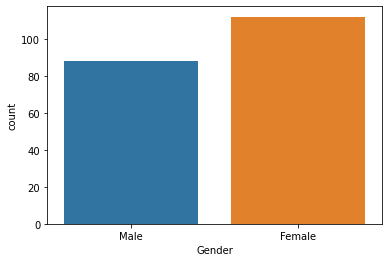

In [9]:
sns.countplot(data=df,x='Gender');

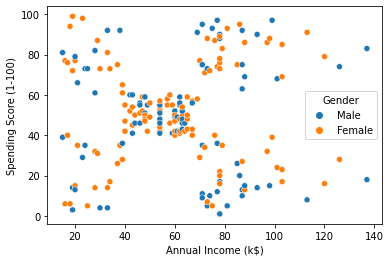

In [10]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender');

**Intuitively we can see that 5 clusters can be reasonable to group the data to.**


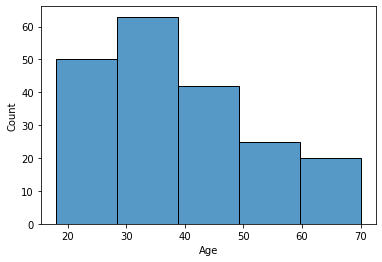

In [11]:
sns.histplot(data=df,x='Age',bins=5)

**Distribution is right skewed indicates as you get older you tend to spend less ;)**

<h3> Data Preparation </h3>

In [12]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [13]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [14]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [15]:
final_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [16]:
df=final_df.drop('CustomerID',axis=1)

In [17]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


<h4>  Feature Scaling </h4>

In [18]:
#as K-means calculates distance metric
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(df)

<h1> K-Means Clustering </h1>

In [19]:
from sklearn.cluster import KMeans

In [20]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

<h2> Model Interpretation </h2>

Text(0, 0.5, ' Sum of Squared Distances')

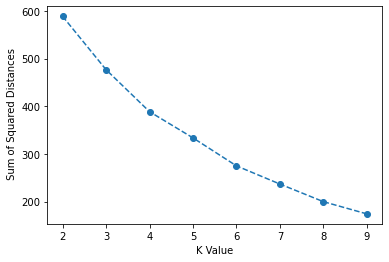

In [21]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [22]:
ssd

[588.8026767824932,
 476.78755441351575,
 388.6517944744494,
 333.62396198922727,
 274.93871880382517,
 236.74484773254193,
 199.78478208926091,
 174.12493921599284]

In [23]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0           NaN
1   -112.015122
2    -88.135760
3    -55.027832
4    -58.685243
5    -38.193871
6    -36.960066
7    -25.659843
dtype: float64

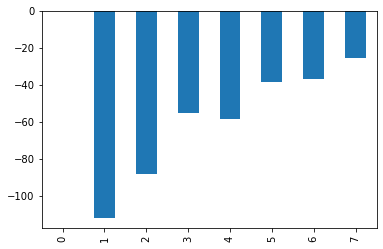

In [24]:
pd.Series(ssd).diff().plot(kind='bar')

<h3> We can see that after making clusters more than 5 cluster the difference is not too much. 
    Optimum clusters=5 </h3>  

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=101)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(df)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


5 Clusters - 0, 1, 2, 3, 4

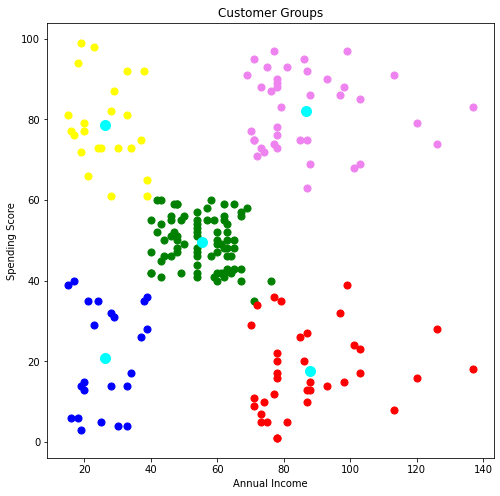

In [26]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(df.iloc[Y==0,1], df.iloc[Y==0,2], s=50, c='green', label='Cluster 1')
plt.scatter(df.iloc[Y==1,1], df.iloc[Y==1,2], s=50, c='red', label='Cluster 2')
plt.scatter(df.iloc[Y==2,1], df.iloc[Y==2,2], s=50, c='yellow', label='Cluster 3')
plt.scatter(df.iloc[Y==3,1], df.iloc[Y==3,2], s=50, c='violet', label='Cluster 4')
plt.scatter(df.iloc[Y==4,1], df.iloc[Y==4,2], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<h1> hierarchical clustering </h1>

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaled_data = scaler.fit_transform(df)

In [31]:
scaled_data

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 1.        ],
       [0.32692308, 0.03278689, 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.36538462, 0.04098361, 0.12244898, 1.        ],
       [0.07692308, 0.04098361, 0.79591837, 1.        ],
       [0.32692308, 0.04918033, 0.34693878, 0.        ],
       [0.03846154, 0.04918033,

In [33]:
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)

In [34]:
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


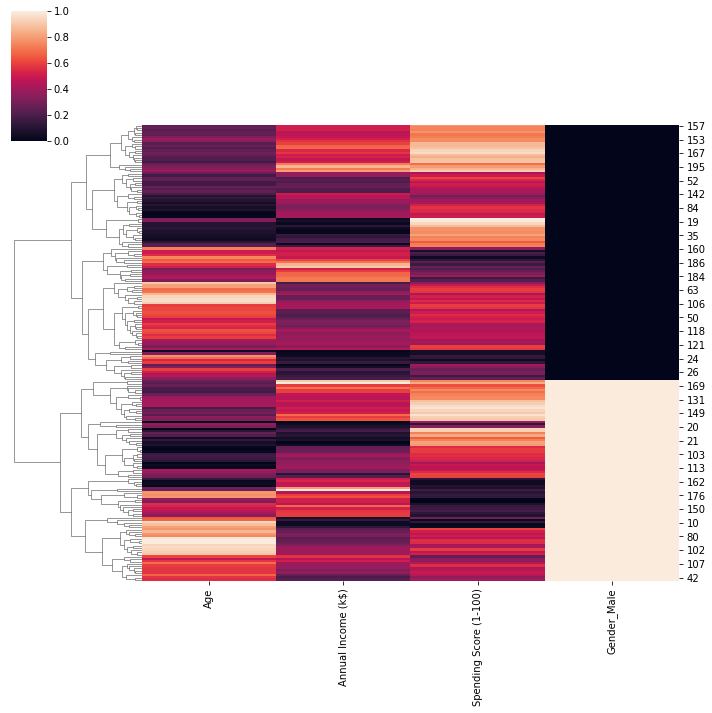

In [35]:
sns.clustermap(scaled_df,col_cluster=False)

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
model = AgglomerativeClustering(n_clusters=5)

In [38]:
cluster_labels = model.fit_predict(scaled_df)

In [39]:
cluster_labels

array([3, 2, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 2, 1, 2, 3, 0, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 0, 3, 0, 3, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0,
       1, 0, 1, 0, 0, 0, 1, 3, 0, 3, 1, 3, 1, 3, 0, 3, 3, 2, 1, 1, 3, 2,
       1, 1, 2, 0, 3, 1, 1, 1, 3, 2, 1, 3, 0, 1, 3, 3, 3, 1, 0, 3, 1, 0,
       0, 1, 1, 2, 3, 0, 0, 2, 1, 0, 3, 2, 0, 1, 3, 2, 3, 0, 1, 3, 3, 3,
       3, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 3, 2, 4, 2, 4, 2,
       0, 0, 4, 0, 1, 2, 4, 0, 1, 2, 0, 0, 4, 2, 3, 0, 1, 2, 4, 2, 1, 0,
       1, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1, 2, 4, 2, 4, 2, 1, 0,
       4, 2, 4, 2, 1, 0, 4, 0, 1, 2, 1, 2, 1, 0, 1, 0, 4, 0, 1, 0, 1, 2,
       4, 2], dtype=int64)

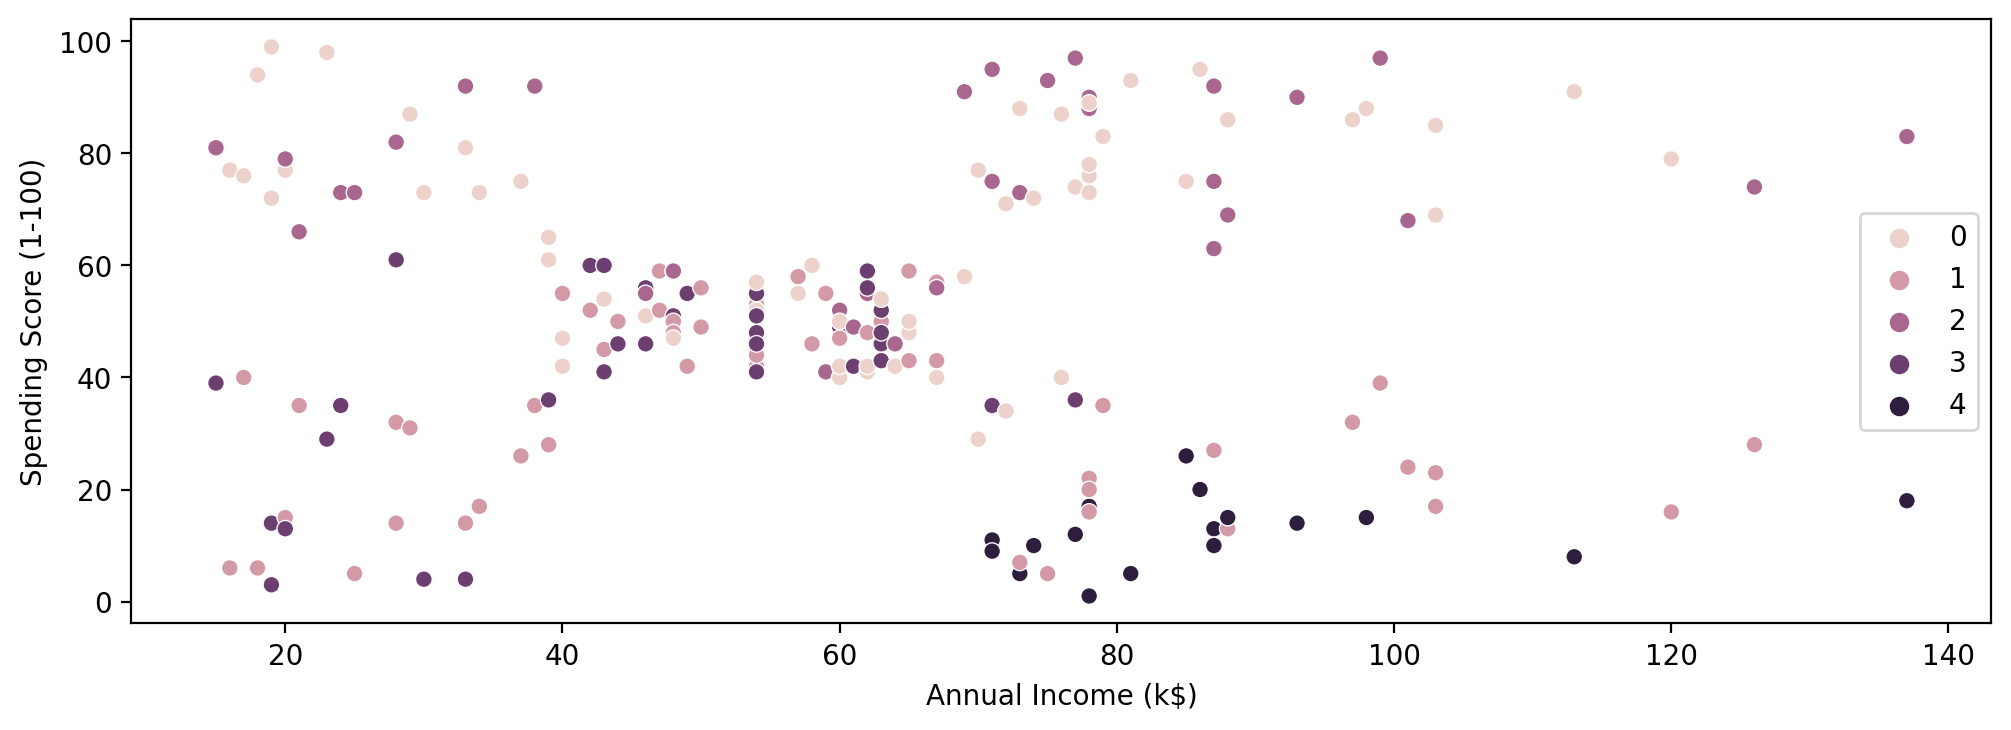

In [40]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue=cluster_labels)

## Exploring Number of Clusters with Dendrograms


#### Assuming every point starts as its own cluster

In [124]:
scaled_df['Annual Income (k$)'].idxmax()

198

In [125]:
scaled_df['Annual Income (k$)'].idxmin()

0

In [126]:

a = scaled_df.iloc[198]
b = scaled_df.iloc[0]
dist = np.linalg.norm(a-b)
print(dist)

1.0528144980702625


In [127]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [128]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [129]:
cluster_labels = model.fit_predict(scaled_data)

In [130]:
cluster_labels

array([3, 0, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 1, 3, 0,
       2, 0, 2, 0, 2, 3, 2, 1, 3, 1, 3, 0, 2, 1, 2, 1, 2, 1, 2, 0, 3, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 1, 3, 3, 0, 2, 2, 3, 0,
       2, 2, 0, 1, 3, 2, 2, 2, 3, 0, 2, 3, 1, 2, 3, 3, 3, 2, 1, 3, 2, 1,
       1, 2, 2, 0, 3, 1, 1, 0, 2, 1, 3, 0, 1, 2, 3, 0, 3, 1, 2, 3, 3, 3,
       3, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 5, 3, 0, 4, 0, 4, 0,
       1, 5, 4, 5, 6, 0, 4, 5, 6, 0, 1, 5, 4, 0, 3, 5, 6, 0, 4, 0, 6, 5,
       6, 5, 4, 5, 4, 5, 6, 5, 4, 5, 4, 5, 4, 5, 6, 0, 4, 0, 4, 0, 6, 5,
       4, 0, 4, 0, 6, 5, 4, 5, 6, 0, 6, 0, 6, 5, 6, 5, 4, 5, 6, 5, 6, 0,
       4, 0], dtype=int64)

In [131]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [132]:
linkage_matrix = hierarchy.linkage(model.children_)

In [121]:
linkage_matrix

array([[ 38.        ,  76.        ,   1.41421356,   2.        ],
       [  2.        , 151.        ,   1.41421356,   2.        ],
       [196.        , 197.        ,   1.41421356,   2.        ],
       [  9.        ,  10.        ,   2.23606798,   2.        ],
       [112.        , 117.        ,   2.23606798,   2.        ],
       [182.        , 183.        ,   2.23606798,   2.        ],
       [189.        , 192.        ,   2.23606798,   2.        ],
       [ 28.        ,  62.        ,   2.23606798,   2.        ],
       [ 52.        ,  69.        ,   2.82842712,   2.        ],
       [ 30.        ,  43.        ,   2.82842712,   2.        ],
       [ 95.        , 128.        ,   2.82842712,   2.        ],
       [ 41.        ,  84.        ,   2.82842712,   2.        ],
       [ 29.        ,  59.        ,   3.16227766,   2.        ],
       [  1.        ,  16.        ,   3.16227766,   2.        ],
       [ 40.        ,  56.        ,   3.16227766,   2.        ],
       [ 27.        ,  32

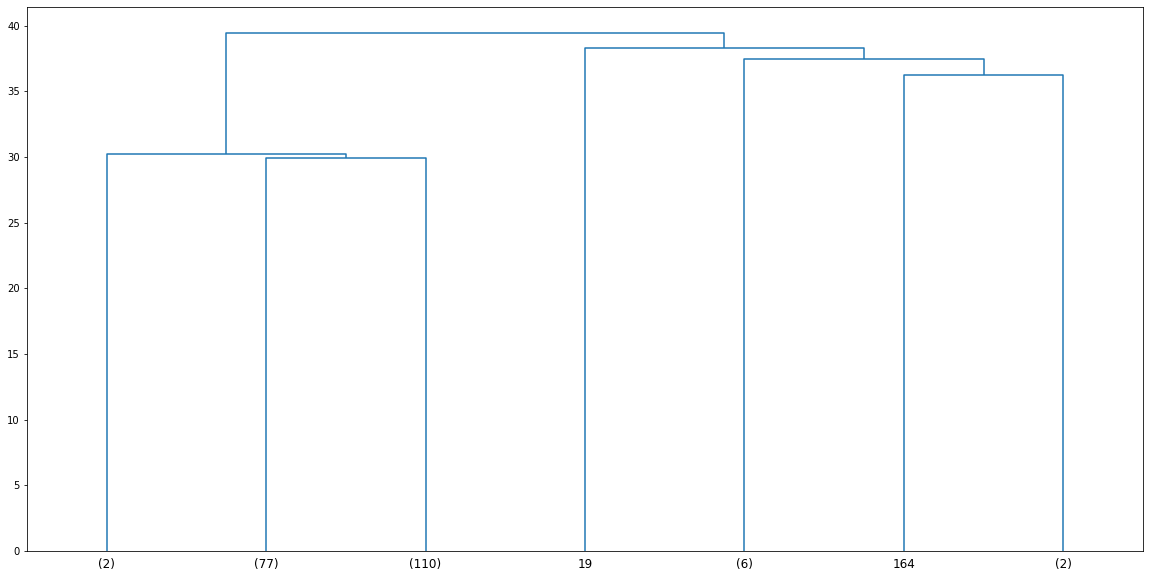

In [123]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=7)

<h2>Here 4 clusters seems like a good choice to make a cut</h2>

In [137]:
hie_model = AgglomerativeClustering(n_clusters=4)
cluster_labels = hie_model.fit_predict(scaled_df)
cluster_labels = hie_model.fit_predict(scaled_df)

In [138]:
cluster_labels

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int64)

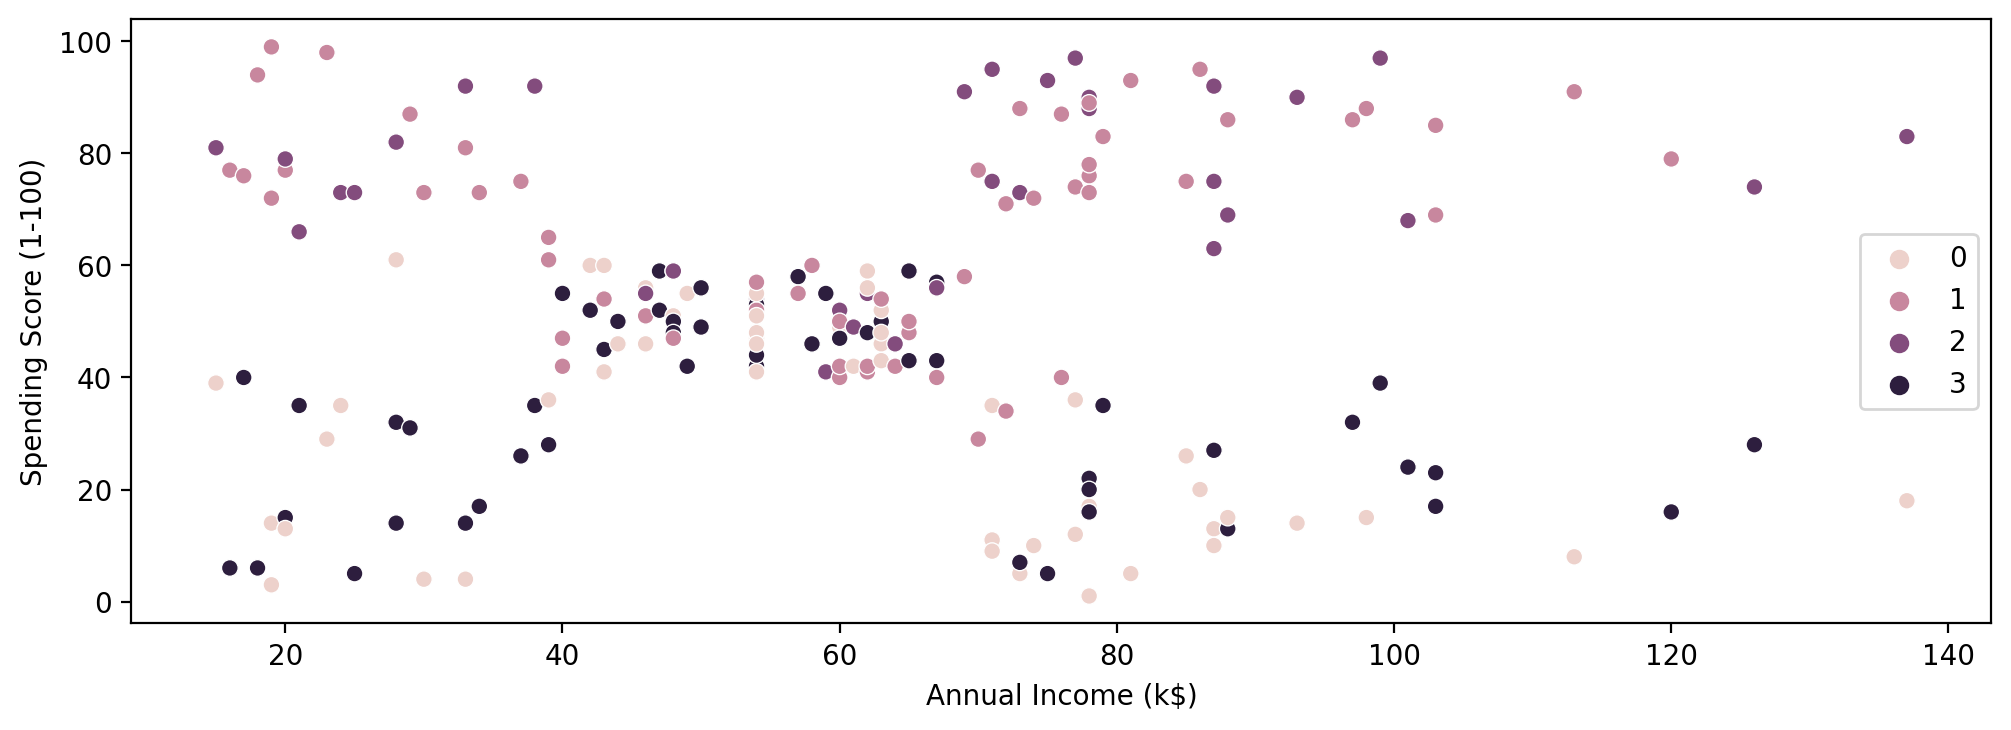

In [139]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue=cluster_labels)